In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [70]:
df=pd.read_csv('Algerian_forest_fires_dataset_CLEANED.csv')

In [71]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [72]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [73]:
df.drop(['day', 'month', 'year'], axis=1, inplace=True)

In [74]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [75]:
## Encoding Categorical Data
df['Classes'] = np.where(df['Classes'].str.contains("not fire"), 0, 1)

In [76]:
df.Classes.value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [77]:
## Independent and Dependent Features
X = df.drop('FWI', axis=1)
y = df['FWI']

In [78]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [79]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((182, 11), (61, 11), (182,), (61,))

In [80]:
## Feature Selection using Correlation 
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


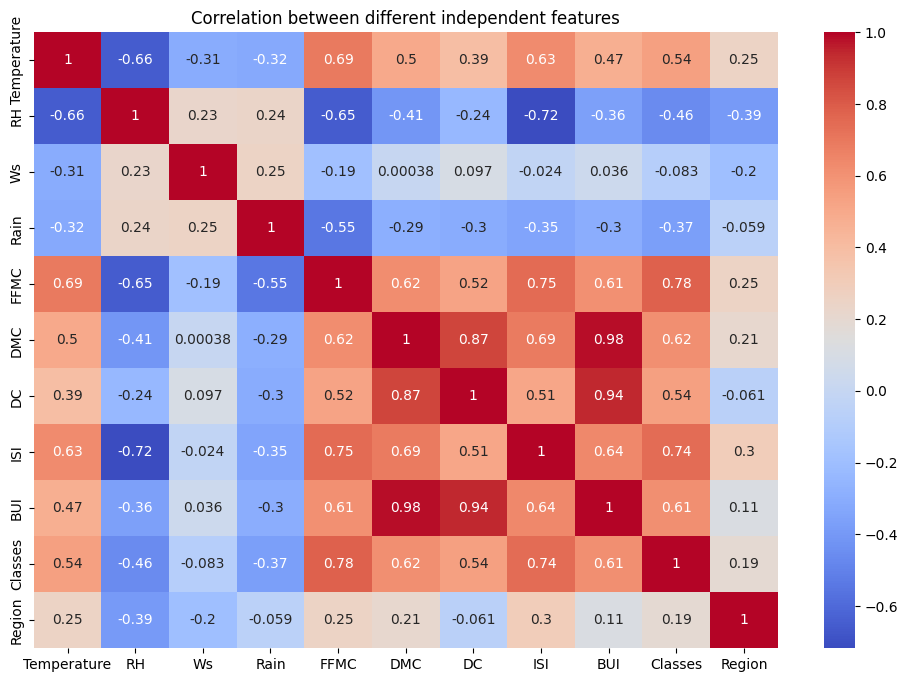

In [81]:
## Lets Check for multicollinearity
plt.figure(figsize=(12,8))
sns.heatmap(X_train.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between different independent features')
plt.show()

In [82]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:  # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
                #if colname in dataset.columns:
                #    del dataset[colname]  # deleting the column from the dataset
    #print(dataset.shape)
    #return dataset
    return col_corr

In [83]:
## Threshold actually set by  Domain Expert
highly_corr =correlation(X_train, 0.85)

In [84]:
## dropping the above feature which is highly correlated
X_train.drop(highly_corr, axis=1, inplace=True)
X_test.drop(highly_corr, axis=1, inplace=True)
X_train.shape, X_test.shape

((182, 9), (61, 9))

## ***Feature Scaling or standardization***

In [85]:
## Feature Scaling or standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_Scaled = scaler.fit_transform(X_train)
X_test_Scaled = scaler.transform(X_test)

## ***Box Plots To understand the effect of standard scaler***

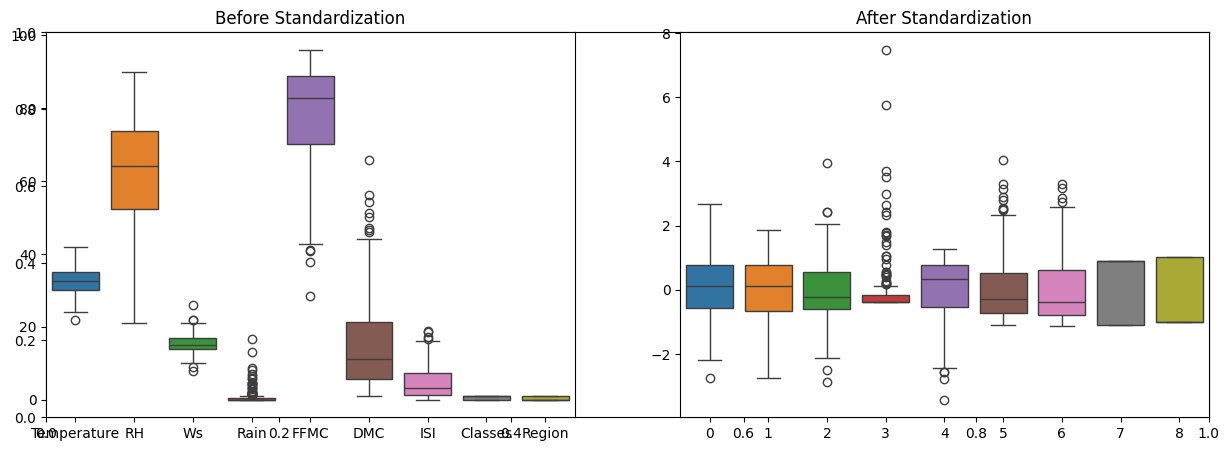

In [86]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('Before Standardization')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_Scaled)
plt.title('After Standardization')
plt.show()

## Linear Regression Model

Mean Squared Error: 0.6742766873791604
Mean Absolute Error: 0.546823646525
R^2 Score: 0.9847657384266951


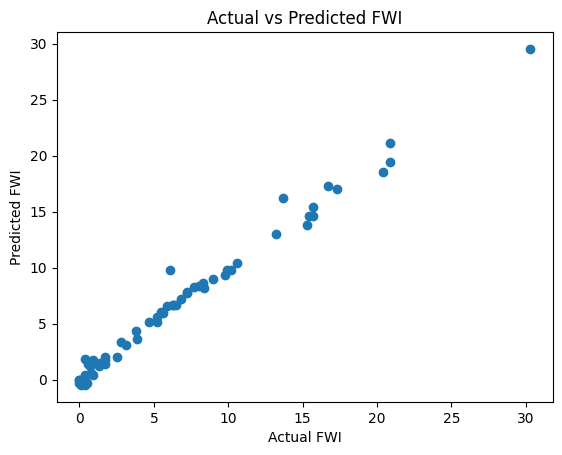

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
lr = LinearRegression()
lr.fit(X_train_Scaled, y_train)
y_pred = lr.predict(X_test_Scaled)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R^2 Score:", r2)

plt.scatter(y_test, y_pred)
plt.xlabel('Actual FWI')
plt.ylabel('Predicted FWI')
plt.title('Actual vs Predicted FWI')
plt.show()

## ***Lasso Regression***

Mean Squared Error: 2.2483458918974764
Mean Absolute Error: 1.133175994914409
R^2 Score: 0.9492020263112388


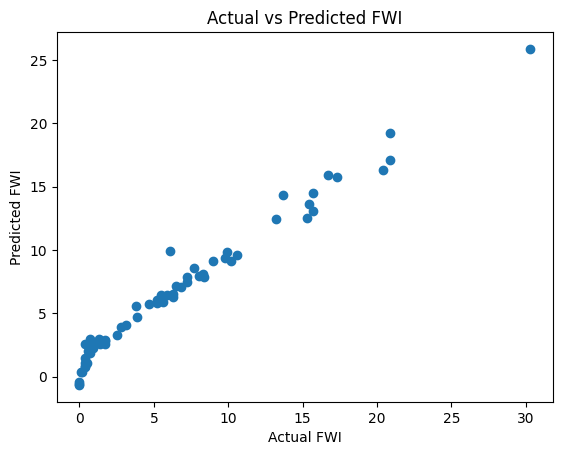

In [88]:
from sklearn.linear_model import Lasso # Lasso Regression used for feature selection and also called L1 regularization
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
lasso = Lasso()
lasso.fit(X_train_Scaled, y_train)
y_pred = lasso.predict(X_test_Scaled)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R^2 Score:", r2)

plt.scatter(y_test, y_pred)
plt.xlabel('Actual FWI')
plt.ylabel('Predicted FWI')
plt.title('Actual vs Predicted FWI')
plt.show()

## ***Cross validation Lasso***

In [89]:
from sklearn.linear_model import LassoCV
lasso_cv = LassoCV(cv=5)
lasso_cv.fit(X_train_Scaled, y_train)
y_pred = lasso_cv.predict(X_test_Scaled)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R^2 Score:", r2)

Mean Squared Error: 0.7924995554743631
Mean Absolute Error: 0.6199701158263435
R^2 Score: 0.9820946715928275


In [90]:
lasso_cv.alpha_

np.float64(0.05725391318234405)

In [91]:
lasso_cv.alphas_

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

In [92]:
lasso_cv.mse_path_

array([[53.64536329, 65.39074075, 54.89628985, 77.90299066, 39.38236846],
       [46.99139716, 59.81506814, 49.29840831, 75.6645852 , 35.31758355],
       [41.14908917, 53.9178721 , 42.49594889, 68.35708298, 31.76996123],
       [36.05788169, 48.41773965, 36.66879347, 61.92819453, 28.67296816],
       [31.62067285, 42.76466229, 31.68391904, 56.26841266, 24.93183295],
       [27.75285367, 37.81922812, 27.42599138, 51.28216115, 21.56888645],
       [24.3807738 , 33.49107651, 23.7950306 , 45.25481907, 18.66094162],
       [21.44052804, 29.70161639, 20.70460191, 39.90418045, 16.14837778],
       [18.876308  , 26.38208059, 18.07969934, 35.23429953, 13.97821475],
       [16.63960395, 23.47341883, 15.85530749, 31.15712074, 12.10483403],
       [14.68819307, 20.92329068, 13.97555108, 27.59649208, 10.48862803],
       [12.98525144, 18.68636627, 12.39173305, 24.48611006,  9.09521221],
       [11.49893734, 16.72312788, 11.06186319, 21.7677198 ,  7.89445038],
       [10.2013182 , 14.9991189 ,  9.9

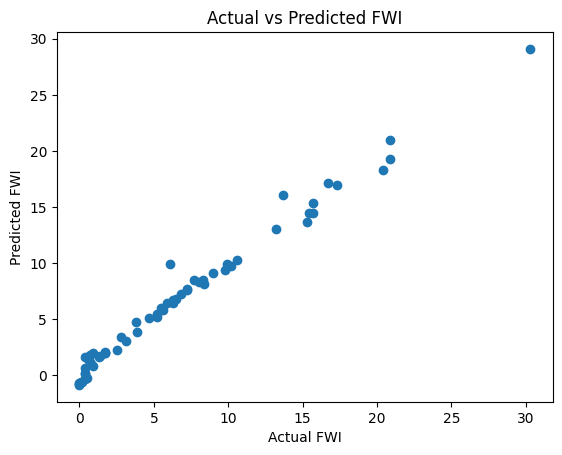

In [93]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual FWI')
plt.ylabel('Predicted FWI')
plt.title('Actual vs Predicted FWI')
plt.show()

## ***Ridge Regression Model***

Mean Squared Error: 0.6949198918152099
Mean Absolute Error: 0.5642305340105713
R^2 Score: 0.9842993364555512


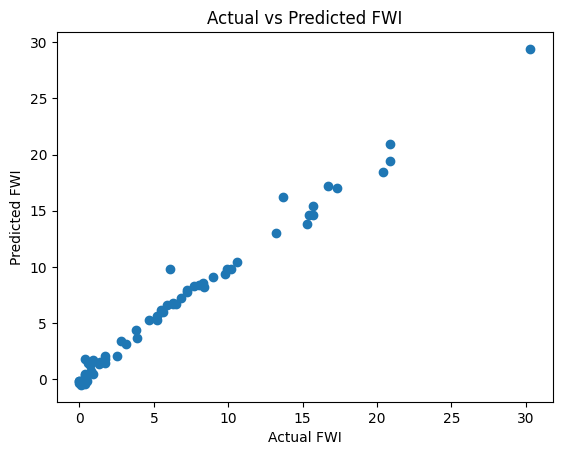

In [94]:
from sklearn.linear_model import Ridge # Ridge Regression used for multicollinearity and remove overfitting and also called L2 regularization
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
ridge = Ridge()
ridge.fit(X_train_Scaled, y_train)
y_pred = ridge.predict(X_test_Scaled)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R^2 Score:", r2)

plt.scatter(y_test, y_pred)
plt.xlabel('Actual FWI')
plt.ylabel('Predicted FWI')
plt.title('Actual vs Predicted FWI')
plt.show()

## ***RidgeCV***

Mean Squared Error: 0.6949198918152099
Mean Absolute Error: 0.5642305340105713
R^2 Score: 0.9842993364555512


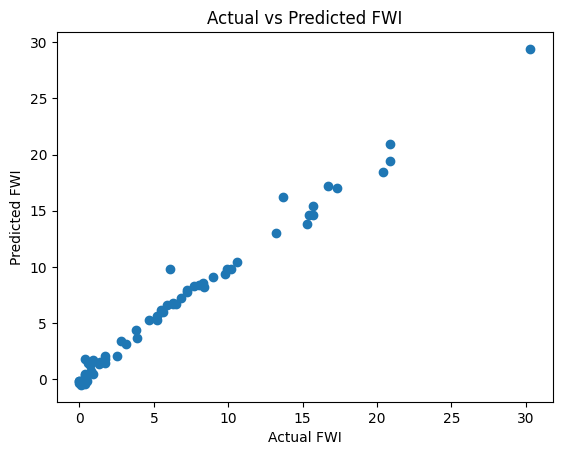

In [95]:
from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(cv=5)
ridge_cv.fit(X_train_Scaled, y_train)
y_pred = ridge_cv.predict(X_test_Scaled)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R^2 Score:", r2)

plt.scatter(y_test, y_pred)
plt.xlabel('Actual FWI')
plt.ylabel('Predicted FWI')
plt.title('Actual vs Predicted FWI')
plt.show()

In [96]:
ridge_cv.alpha_

np.float64(1.0)

In [97]:
ridge_cv.alphas

(0.1, 1.0, 10.0)

## ***Elastic-Net Regression***

Mean Squared Error: 5.517251101025224
Mean Absolute Error: 1.8822353634896
R^2 Score: 0.8753460589519703


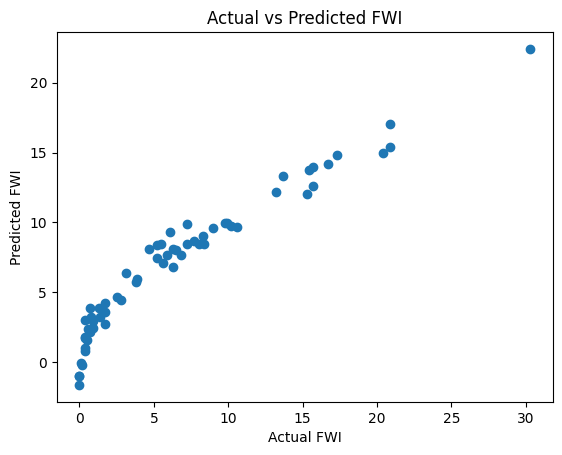

In [98]:
from sklearn.linear_model import ElasticNet # Elastic-Net Regression is a combination of both Lasso and Ridge Regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
elastic_net = ElasticNet()
elastic_net.fit(X_train_Scaled, y_train)
y_pred = elastic_net.predict(X_test_Scaled)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R^2 Score:", r2)

plt.scatter(y_test, y_pred)
plt.xlabel('Actual FWI')
plt.ylabel('Predicted FWI')
plt.title('Actual vs Predicted FWI')
plt.show()

## ***Elastic-Net CV***

Mean Squared Error: 0.8222830416276267
Mean Absolute Error: 0.6575946731430904
R^2 Score: 0.9814217587854941


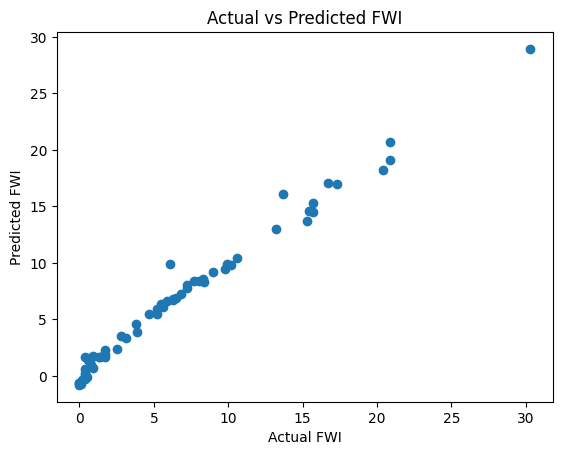

In [99]:
from sklearn.linear_model import ElasticNetCV
elastic_net_cv = ElasticNetCV(cv=5)
elastic_net_cv.fit(X_train_Scaled, y_train)
y_pred = elastic_net_cv.predict(X_test_Scaled)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R^2 Score:", r2)

plt.scatter(y_test, y_pred)
plt.xlabel('Actual FWI')
plt.ylabel('Predicted FWI')
plt.title('Actual vs Predicted FWI')
plt.show()

In [100]:
elastic_net_cv.alpha_

np.float64(0.04311146156383888)

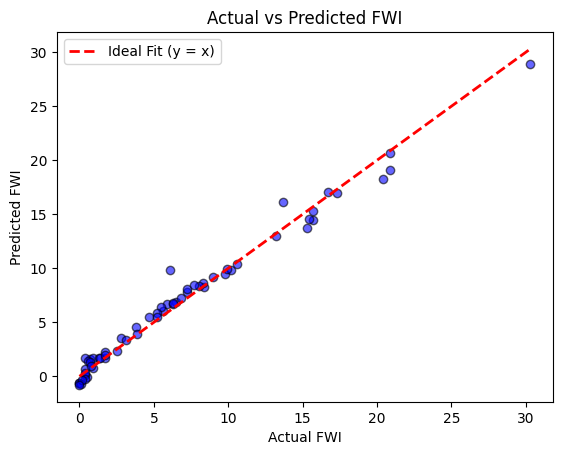

In [101]:
plt.scatter(y_test, y_pred, c='blue', alpha=0.6, edgecolor='k')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', linewidth=2, label='Ideal Fit (y = x)')
plt.xlabel('Actual FWI')
plt.ylabel('Predicted FWI')
plt.title('Actual vs Predicted FWI')
plt.legend()
plt.show()

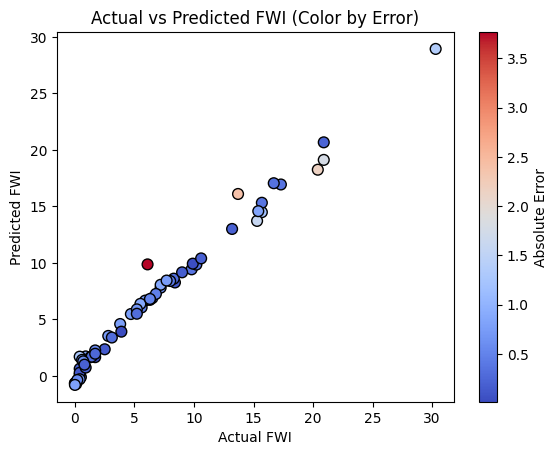

In [102]:
errors = abs(y_test - y_pred)

plt.scatter(y_test, y_pred, c=errors, cmap='coolwarm', s=60, edgecolor='k')
plt.xlabel('Actual FWI')
plt.ylabel('Predicted FWI')
plt.title('Actual vs Predicted FWI (Color by Error)')
plt.colorbar(label='Absolute Error')
plt.show()

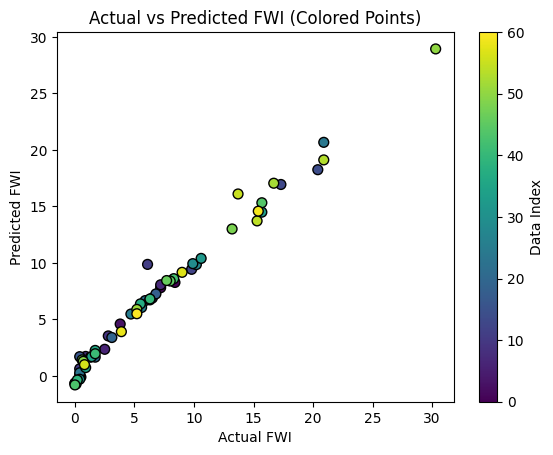

In [103]:
import matplotlib.pyplot as plt
import numpy as np

# Example: color each point differently
colors = np.arange(len(y_test))

plt.scatter(y_test, y_pred, c=colors, cmap='viridis', s=50, edgecolor='k')
plt.xlabel('Actual FWI')
plt.ylabel('Predicted FWI')
plt.title('Actual vs Predicted FWI (Colored Points)')
plt.colorbar(label='Data Index')
plt.show()


## pickle the Machine Learning Model & alsp preprocesing the Model

In [104]:
scaler

,copy,True
,with_mean,True
,with_std,True


In [105]:
ridge

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [106]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))

In [107]:
import streamlit as st
import pickle
import numpy as np

# Load saved model and scaler
ridge = pickle.load(open('ridge.pkl', 'rb'))
scaler = pickle.load(open('scaler.pkl', 'rb'))

# Streamlit UI
st.title("🔥 FWI Prediction")

st.markdown("### Enter the following inputs:")

# Input fields
Temperature = st.number_input("Temperature", value=25.0)
RH = st.number_input("Relative Humidity (RH)", value=40.0)
Ws = st.number_input("Wind Speed (Ws)", value=10.0)
Rain = st.number_input("Rain (mm)", value=0.0)
FFMC = st.number_input("FFMC", value=85.0)
DMC = st.number_input("DMC", value=50.0)
ISI = st.number_input("ISI", value=5.0)
Classes = st.number_input("Classes (0 or 1)", value=0)
Region = st.number_input("Region (1 or 2)", value=1)

# Predict button
if st.button("Predict"):
    # Create input array
    input_data = np.array([[Temperature, RH, Ws, Rain, FFMC, DMC, ISI, Classes, Region]])

    # Scale input
    scaled_data = scaler.transform(input_data)

    # Make prediction
    prediction = ridge.predict(scaled_data)[0]

    st.markdown(f"### 🌲 THE FWI prediction is **{prediction:.6f}**")


2025-09-30 00:47:44.391 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-30 00:47:44.451 
  command:

    streamlit run /Users/niteshranjansingh/AutoPipelineAI/venv/lib/python3.11/site-packages/ipykernel_launcher.py [ARGUMENTS]
2025-09-30 00:47:44.451 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-30 00:47:44.452 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-30 00:47:44.453 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-30 00:47:44.453 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-30 00:47:44.453 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-30 00:47